In [1]:
import pandas as pd
import pandas_datareader
import datetime
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.pylab import style
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
% matplotlib inline


style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


D:\Coding\Anaconda3\envs\idata\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# 读取数据
stock = pd.read_csv(
    "E:\Workspace\jupyter_notebook\\notebook_idata_lesson01\Date-Time\data\T10yr.csv",
    index_col=0, parse_dates=[0]
)
stock[:5]


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,6.498,6.603,6.498,6.548,0,6.548
2000-01-04,6.530,6.548,6.485,6.485,0,6.485
2000-01-05,6.521,6.599,6.508,6.599,0,6.599
2000-01-06,6.558,6.585,6.540,6.549,0,6.549
2000-01-07,6.545,6.595,6.504,6.504,0,6.504


In [12]:
stock_week = stock['Close'].resample('W-MON').mean()
stock_train = stock_week['2000':'2015']
stock_train[:5]


Date
2000-01-03    6.5480
2000-01-10    6.5390
2000-01-17    6.6630
2000-01-24    6.7372
2000-01-31    6.6728
Freq: W-MON, Name: Close, dtype: float64

Text(0.5,1,'Stock Close')

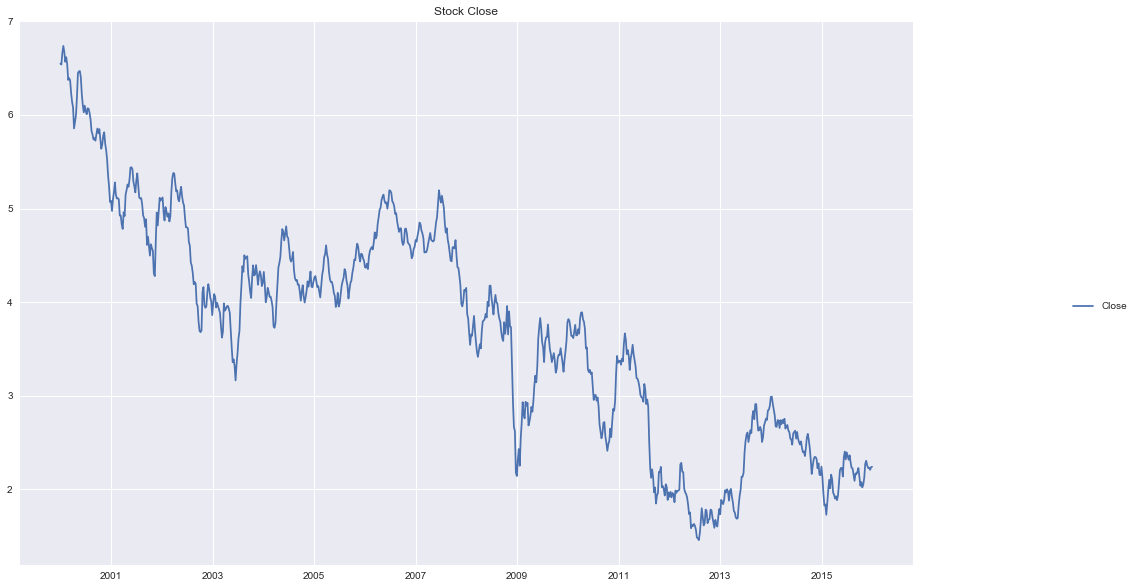

In [15]:
sns.set()
plt.figure(figsize=(16, 10))
plt.plot(stock_train)
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title("Stock Close")


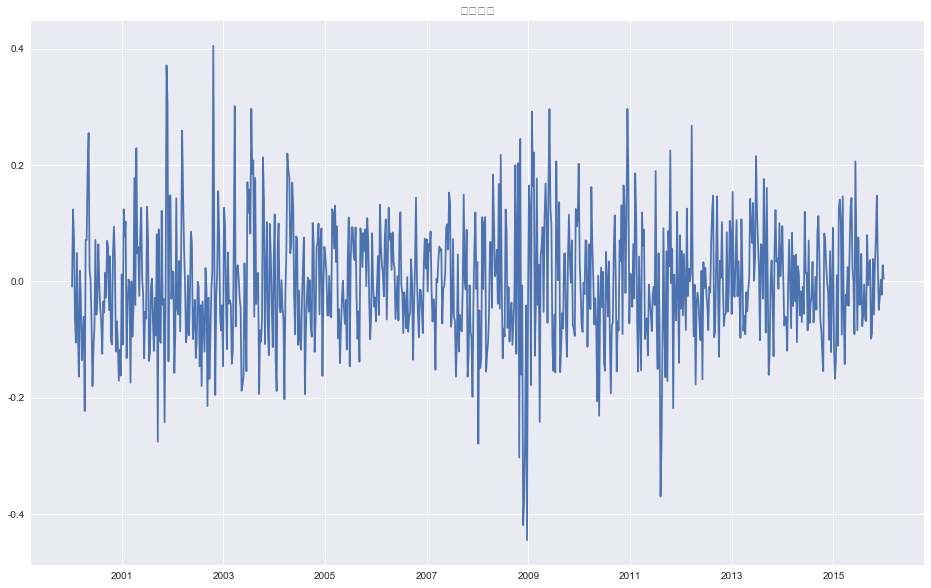

In [16]:
# 一阶差分
stock_diff = stock_train.diff()
stock_diff = stock_diff.dropna()

plt.figure(figsize=(16, 10))
plt.plot(stock_diff)
plt.title("一阶差分")
plt.show()


D:\Coding\Anaconda3\envs\idata\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


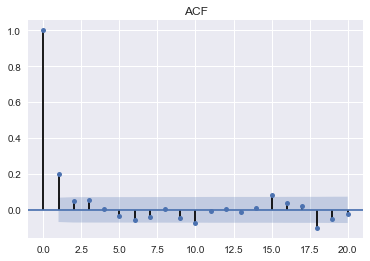

In [23]:
# acf
acf = plot_acf(stock_diff, lags=20)
plt.title("ACF")
plt.show()


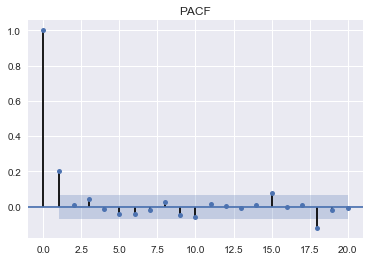

In [25]:
# pacf
pacf = plot_pacf(stock_diff, lags=20)
plt.title("PACF")
plt.show()


In [26]:
# 训练模型
model = ARIMA(stock_train, order=(1, 1, 1), freq="W-MON")
result = model.fit()


D:\Coding\Anaconda3\envs\idata\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
D:\Coding\Anaconda3\envs\idata\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [27]:
pred = result.predict('20140609', '20160701', dynamic=True, typ='levels')
print(pred)


2014-06-09    2.463559
2014-06-16    2.455539
2014-06-23    2.449569
2014-06-30    2.444183
2014-07-07    2.438962
2014-07-14    2.433788
2014-07-21    2.428627
2014-07-28    2.423470
2014-08-04    2.418315
2014-08-11    2.413159
2014-08-18    2.408004
2014-08-25    2.402849
2014-09-01    2.397693
2014-09-08    2.392538
2014-09-15    2.387383
2014-09-22    2.382227
2014-09-29    2.377072
2014-10-06    2.371917
2014-10-13    2.366761
2014-10-20    2.361606
2014-10-27    2.356451
2014-11-03    2.351296
2014-11-10    2.346140
2014-11-17    2.340985
2014-11-24    2.335830
2014-12-01    2.330674
2014-12-08    2.325519
2014-12-15    2.320364
2014-12-22    2.315208
2014-12-29    2.310053
                ...   
2015-12-07    2.057443
2015-12-14    2.052288
2015-12-21    2.047132
2015-12-28    2.041977
2016-01-04    2.036822
2016-01-11    2.031666
2016-01-18    2.026511
2016-01-25    2.021356
2016-02-01    2.016201
2016-02-08    2.011045
2016-02-15    2.005890
2016-02-22    2.000735
2016-02-29 

D:\Coding\Anaconda3\envs\idata\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


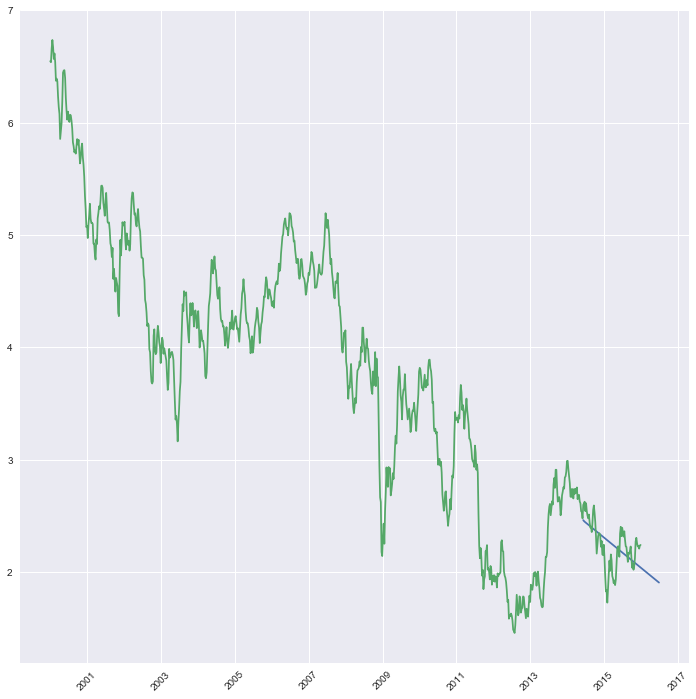

In [29]:
plt.figure(figsize=(12, 12))
plt.xticks(rotation=45)
# 预测值
plt.plot(pred)
# 真实值
plt.plot(stock_train)
